In [206]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

## Loading Data to a Pandas DataFrame

In [207]:
data_file = 'data/cscpopendata.csv'
data_df = pd.read_csv(data_file)

In [208]:
data_df.head(10)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,07/09/2009,08/28/2013,11/01/2010,07/09/2009,07/09/2009,NaN,1
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
7,7,ABSOLUTE Precision Color Powder System - All S...,311.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
8,7,ABSOLUTE Precision Color Powder System - All S...,312.0,D&C RED 28,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
9,8,ABSOLUTE Precision Color Powder System Opaque ...,313.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,60,...,13463-67-7,17903,Titanium dioxide,07/13/2009,12/30/2010,NaN,06/09/2010,06/09/2010,NaN,1


In [209]:
data_df.tail(10)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
113770,41347,DP DONUT EYESHADOW PALLET,64676.0,t - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),49,...,NaN,67733,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113771,41348,DP DONUT EYESHADOW PALLET,64677.0,WHITE - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",SUN CHEMICAL,44,Makeup Products (non-permanent),48,...,13463-67-7,67734,Titanium dioxide,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113772,41348,DP DONUT EYESHADOW PALLET,64677.0,WHITE - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",SUN CHEMICAL,44,Makeup Products (non-permanent),49,...,13463-67-7,67734,Titanium dioxide,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113773,41349,DP NAIL POLISH GEL LIKE 4PC,64678.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67735,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113774,41350,DP NAIL POLISH GLDRK 8PC,64679.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67736,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113775,41351,DP NAIL POLISH ART KIT 18PC,64680.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67737,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113776,41352,DP NAIL POLISH 4PC METALLIC,64681.0,TRANSPARENT - N - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67738,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113777,41353,DP EYESHADOW 44 SHADE CUBE,64682.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),48,...,NaN,67739,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113778,41354,DP EYESHADOW PURSE,64683.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),48,...,NaN,67740,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113779,41355,DP NAIL POLISH GEL LIKE 4PC,64684.0,WHITE - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",SUN CHEMICAL,59,Nail Products,65,...,13463-67-7,67741,Titanium dioxide,04/01/2020,04/01/2020,NaN,04/01/2020,04/01/2020,NaN,1


In [210]:
# Get column info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113780 entries, 0 to 113779
Data columns (total 22 columns):
CDPHId                    113780 non-null int64
ProductName               113780 non-null object
CSFId                     79917 non-null float64
CSF                       79493 non-null object
CompanyId                 113780 non-null int64
CompanyName               113780 non-null object
BrandName                 113568 non-null object
PrimaryCategoryId         113780 non-null int64
PrimaryCategory           113780 non-null object
SubCategoryId             113780 non-null int64
SubCategory               113780 non-null object
CasId                     113780 non-null int64
CasNumber                 107464 non-null object
ChemicalId                113780 non-null int64
ChemicalName              113780 non-null object
InitialDateReported       113780 non-null object
MostRecentDateReported    113780 non-null object
DiscontinuedDate          12906 non-null object
ChemicalCreated

## Handling Null Values

In [211]:
print('Columns with Null Values:')
null_count = data_df.isna().sum()
null_count_df = null_count[null_count > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Columns with Null Values:


,Column,Number of Null Values
5,ChemicalDateRemoved,110848
4,DiscontinuedDate,100874
1,CSF,34287
0,CSFId,33863
3,CasNumber,6316
2,BrandName,212


In [212]:
# Replace all null BrandName values with 'Missing'
data_df2 = data_df.copy()
data_df2.loc[data_df2['BrandName'].isna()==True, 'BrandName'] = 'Missing'

In [213]:
print('Remaining columns with Null Values:')
null_count2 = data_df2.isna().sum()
null_count2_df = null_count2[null_count2 > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count2_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Remaining columns with Null Values:


,Column,Number of Null Values
4,ChemicalDateRemoved,110848
3,DiscontinuedDate,100874
1,CSF,34287
0,CSFId,33863
2,CasNumber,6316


## Converting Date Str Columns to Date-Time Type

In [214]:
date_cols = ['InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate', 
             'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved']
data_df3 = data_df2.copy()

data_df3[date_cols] = data_df3[date_cols].apply(pd.to_datetime)

data_df3.info()
data_df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113780 entries, 0 to 113779
Data columns (total 22 columns):
CDPHId                    113780 non-null int64
ProductName               113780 non-null object
CSFId                     79917 non-null float64
CSF                       79493 non-null object
CompanyId                 113780 non-null int64
CompanyName               113780 non-null object
BrandName                 113780 non-null object
PrimaryCategoryId         113780 non-null int64
PrimaryCategory           113780 non-null object
SubCategoryId             113780 non-null int64
SubCategory               113780 non-null object
CasId                     113780 non-null int64
CasNumber                 107464 non-null object
ChemicalId                113780 non-null int64
ChemicalName              113780 non-null object
InitialDateReported       113780 non-null datetime64[ns]
MostRecentDateReported    113780 non-null datetime64[ns]
DiscontinuedDate          12906 non-null dateti

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


## Counting Unique Values per Column

In [215]:
print('Number of Unique Values per Column:')
num_unique_df = data_df3.nunique(axis=0).to_frame().reset_index()
num_unique_df.sort_values(0, ascending=False).rename(columns={'index': 'Column', 0: 'Number of Unique Values'})

Number of Unique Values per Column:


,Column,Number of Unique Values
2,CSFId,57841
13,ChemicalId,57737
0,CDPHId,36794
3,CSF,34195
1,ProductName,33565
6,BrandName,2706
19,ChemicalUpdatedAt,2283
18,ChemicalCreatedAt,2277
15,InitialDateReported,2232
16,MostRecentDateReported,2134


In [216]:
# Take final df after cleaning
clean_data_df = data_df3

# EDA

## Cosmetics Primary Categories

(array([76696., 15328.,   756.,  4939.,  3444.,  8305.,  1477.,  2057.,
          507.,   271.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

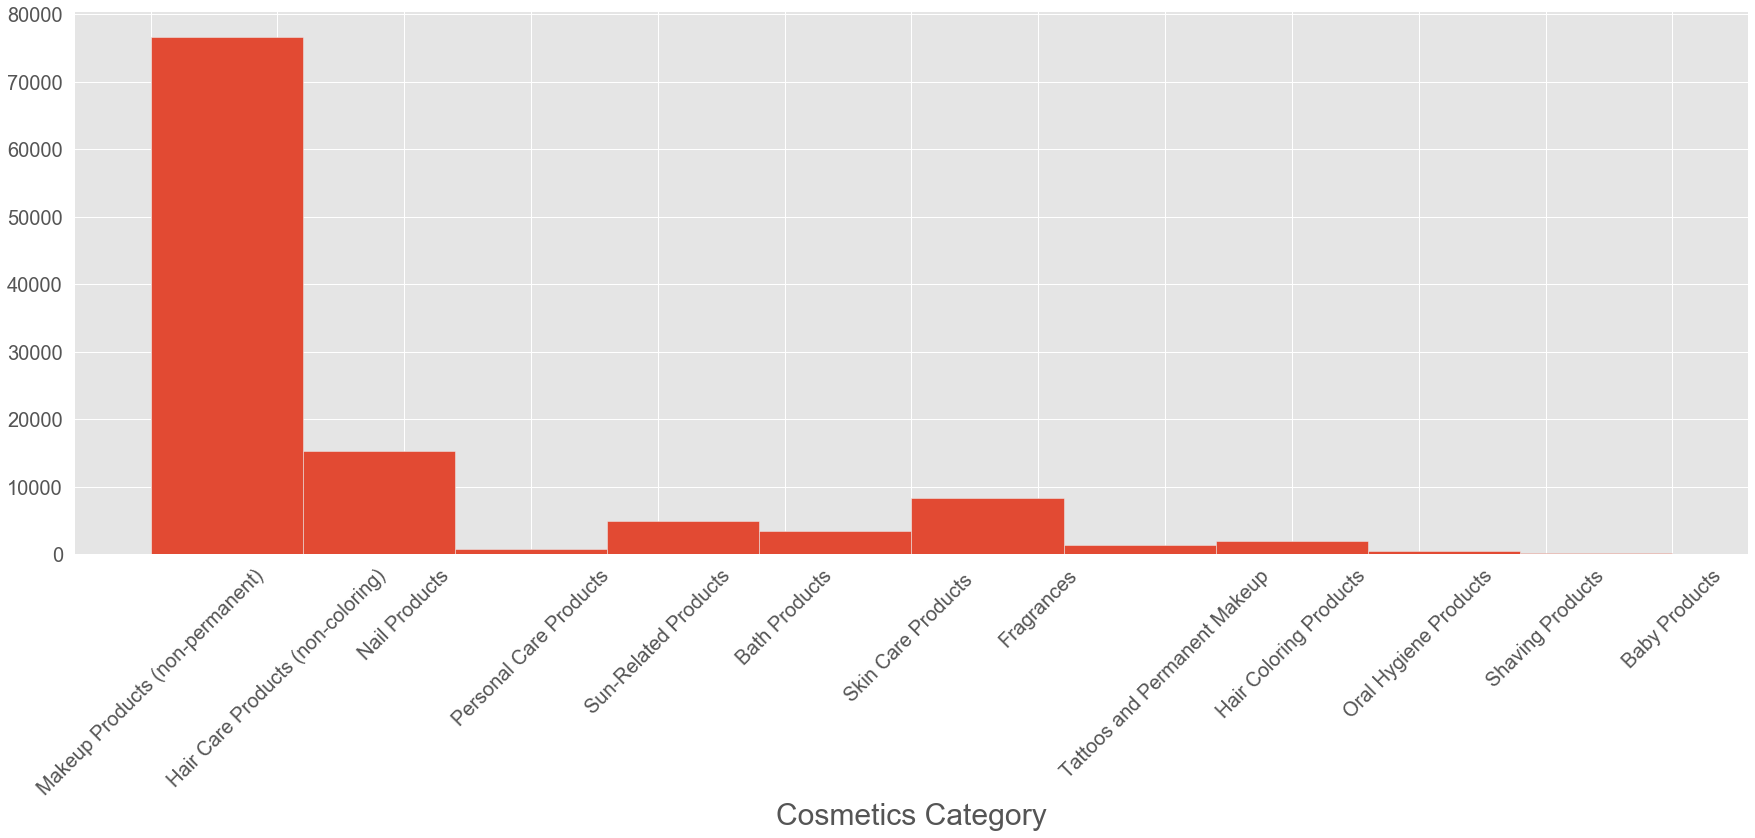

In [217]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.hist(clean_data_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
plt.show()

In [218]:
clean_data_df['PrimaryCategory'].value_counts()

Makeup Products (non-permanent)      75081
Nail Products                        15328
Skin Care Products                    7661
Sun-Related Products                  4939
Bath Products                         3444
Hair Coloring Products                2057
Hair Care Products (non-coloring)     1615
Tattoos and Permanent Makeup          1477
Personal Care Products                 756
Fragrances                             644
Oral Hygiene Products                  507
Shaving Products                       222
Baby Products                           49
Name: PrimaryCategory, dtype: int64

In [219]:
idxes = clean_data_df[clean_data_df['PrimaryCategory']=='Makeup Products (non-permanent)'].index

In [220]:
no_makeup_df = clean_data_df.drop(idxes)

(array([16943.,   756.,  4939.,  3444.,  7661.,   644.,  1477.,  2057.,
          507.,   271.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

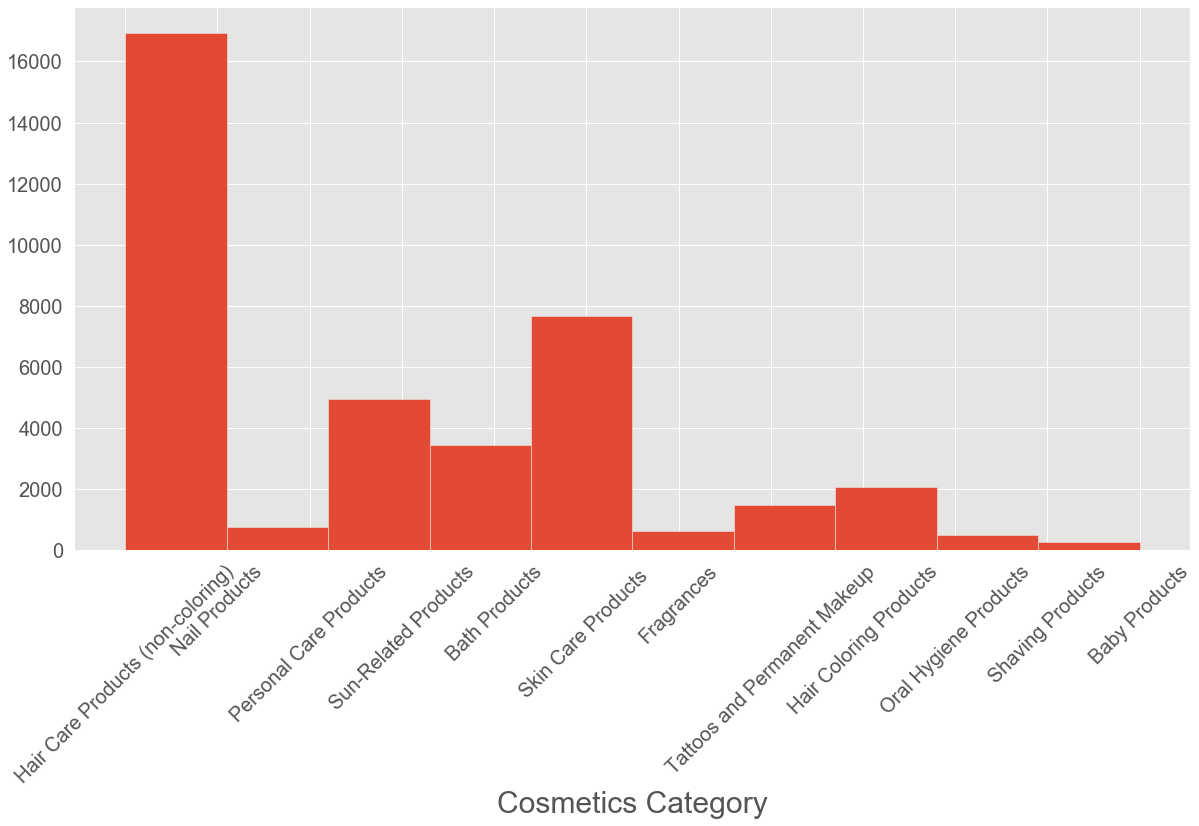

In [221]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(no_makeup_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
plt.show()

## Chemical Counts

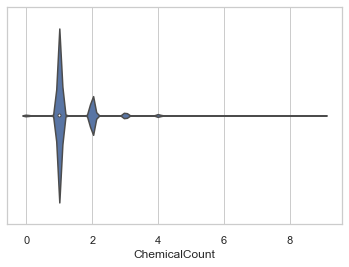

In [222]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=clean_data_df['ChemicalCount'])

In [223]:
clean_data_df['ChemicalCount'].value_counts()

1    86922
2    21026
3     3330
4     1421
0      857
5      105
8       41
7       36
6       33
9        9
Name: ChemicalCount, dtype: int64

In [224]:
five_or_more_chemicals_list = [i for i in range(5,10)]
five_or_more_chemicals_df = clean_data_df[clean_data_df['ChemicalCount']
                                          .isin(five_or_more_chemicals_list)]
five_or_more_chemicals_df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
2555,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,NaN,922,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5
2556,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,NaN,923,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5
2557,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,NaN,1254,"2,4-Hexadienal (89% trans, trans isomer; 11% c...",2009-09-14,2009-09-18,NaT,2009-09-18,2009-09-18,2009-09-18,5
2558,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,79-81-2,1446,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5
2559,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,13463-67-7,1447,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5


In [225]:
zero_chemicals_df = clean_data_df[clean_data_df['ChemicalCount']==0]
zero_chemicals_df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
31,24,White Premium Lotion Soap,NaN,NaN,181,"GOJO Industries, Inc.",GOJO�,74,Personal Care Products,170,...,68603-42-9,26,Cocamide diethanolamine,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,0
497,333,Gentle Cleanser,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,6,Bath Products,159,...,68603-42-9,350,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-02,2013-09-16,2009-11-23,0
498,334,Cleansing Foam,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,...,68603-42-9,351,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-02,2009-09-03,2009-09-02,0
499,334,Cleansing Foam,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,...,68603-42-9,412,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-03,2013-12-05,2009-09-02,0
500,334,Cleansing Foam,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,...,NaN,453,"Retinol/retinyl esters, when in daily dosages ...",2009-09-02,2013-09-16,NaT,2009-09-03,2013-12-05,2103-12-05,0


(array([288., 181., 112.,  36., 137.,  12.,  14.,   6.,   3.,  68.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

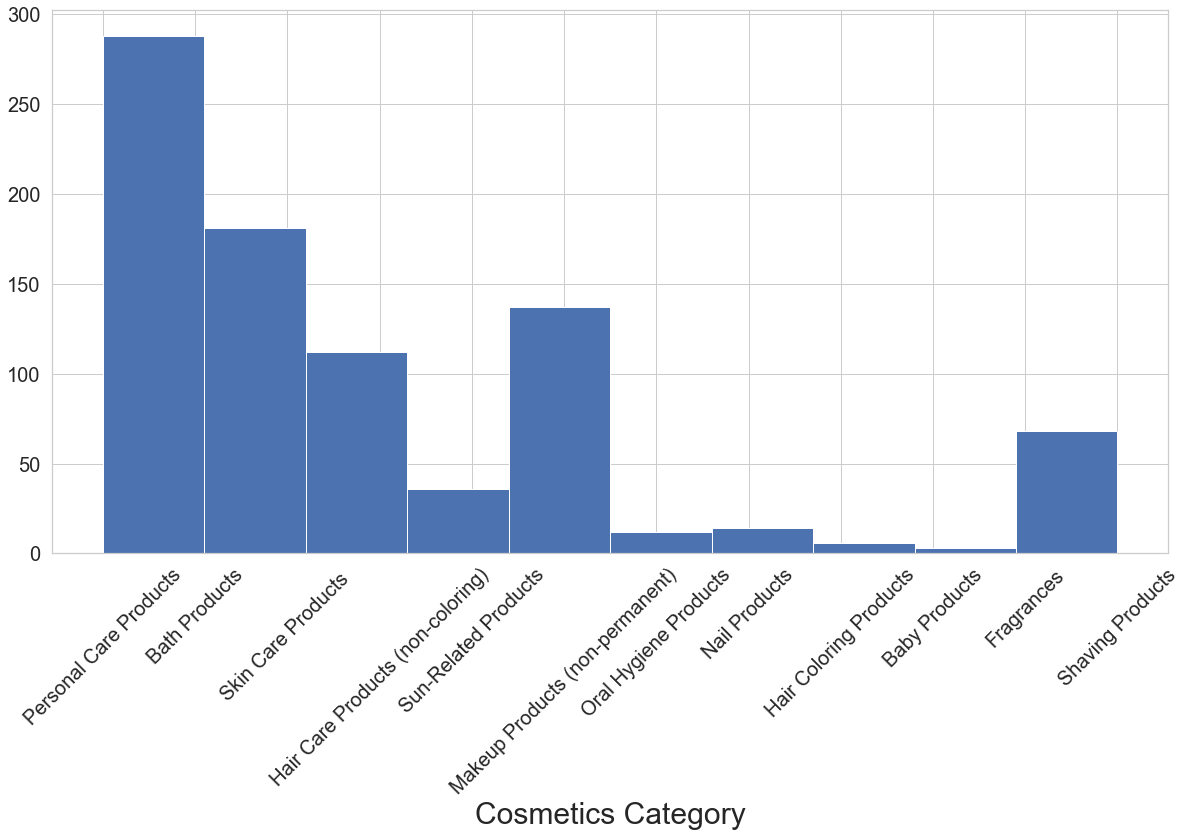

In [226]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(zero_chemicals_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
plt.show()

## Discontinued Products

In [227]:
discontinued_df = clean_data_df[clean_data_df['DiscontinuedDate'].isna()==False]
discontinued_df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1
30,18,SPECTRA LASH MASCARA �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),162,...,13463-67-7,24,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,1
381,222,ANEW EYELIFTING SERUM SHADOW-ALL SHADES �,NaN,NaN,4,New Avon LLC,ANEW,44,Makeup Products (non-permanent),48,...,13463-67-7,235,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2


In [228]:
discontinued_df

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1
30,18,SPECTRA LASH MASCARA �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),162,...,13463-67-7,24,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,1
381,222,ANEW EYELIFTING SERUM SHADOW-ALL SHADES �,NaN,NaN,4,New Avon LLC,ANEW,44,Makeup Products (non-permanent),48,...,13463-67-7,235,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111805,40747,Sexy Mother Pucker Mini Gloss Sticks - Glossed...,NaN,NaN,784,Soap and Glory Ltd,Soap & Glory,44,Makeup Products (non-permanent),52,...,13463-67-7,66657,Titanium dioxide,2019-12-30,2019-12-30,2019-01-01,2019-12-30,2019-12-30,NaT,1
112545,40966,Hello Flawless,63823.0,"""I Love Me"" Ivory",191,Benefit Cosmetics,Benefit Cosmetics,44,Makeup Products (non-permanent),49,...,13463-67-7,67021,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,1
112546,40966,Hello Flawless,63824.0,"""Never Settle"" Petal",191,Benefit Cosmetics,Benefit Cosmetics,44,Makeup Products (non-permanent),49,...,13463-67-7,67021,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,1
112547,40966,Hello Flawless,63825.0,"""I'm Cute as a Bunny"" Honey",191,Benefit Cosmetics,Benefit Cosmetics,44,Makeup Products (non-permanent),49,...,13463-67-7,67021,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,1


## Reformulated Products

In [229]:
reformulated_df = clean_data_df[clean_data_df['ChemicalDateRemoved'].isna()==False]
reformulated_df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
31,24,White Premium Lotion Soap,NaN,NaN,181,"GOJO Industries, Inc.",GOJO�,74,Personal Care Products,170,...,68603-42-9,26,Cocamide diethanolamine,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,0
36,29,Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen ...,NaN,NaN,31,"Aloecare International, LLC",Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen ...,106,Sun-Related Products,107,...,13463-67-7,39,Titanium dioxide,2009-08-11,2009-08-11,NaT,2009-08-21,2009-08-21,2009-08-21,1
224,71,Colorstay 12 Hour Eye Shadow Quad- rose shimme...,NaN,NaN,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),48,...,13463-67-7,78,Titanium dioxide,2009-08-26,2009-08-26,NaT,2009-08-26,2009-09-14,2009-09-14,1
431,269,Elizabeth Arden Green Tea Relaxing Bubble Bath,NaN,NaN,69,"Elizabeth Arden, Inc.",Elizabeth Arden,6,Bath Products,9,...,13463-67-7,281,Titanium dioxide,2009-09-01,2017-01-12,2013-05-13,2009-09-01,2009-09-25,2009-09-25,1
432,269,Elizabeth Arden Green Tea Relaxing Bubble Bath,NaN,NaN,69,"Elizabeth Arden, Inc.",Elizabeth Arden,6,Bath Products,9,...,NaN,1875,"Retinol/retinyl esters, when in daily dosages ...",2009-09-01,2017-01-12,2013-05-13,2009-09-25,2009-09-29,2009-09-29,1


# Mon, 4/6
* There are 36,794 unique products identified by CDPHId
    * Can have multiple categories (PrimaryCategory, SubCategory) 
    * Can have multiple chemicals (ChemicalName)
    * Can have multiple CSFIds (Color/Scent/Flavor)

```
	Column	Number of Unique Values
2	CSFId	57841
13	ChemicalId	57737
0	CDPHId	36794
3	CSF	34195   
1	ProductName	33565
6	BrandName	2705
19	ChemicalUpdatedAt	2283
18	ChemicalCreatedAt	2277
15	InitialDateReported	2232
16	MostRecentDateReported	2134
17	DiscontinuedDate	986
4	CompanyId	633
5	CompanyName	604
20	ChemicalDateRemoved	519
11	CasId	134
12	CasNumber	125
14	ChemicalName	123
9	SubCategoryId	92
10	SubCategory	89
8	PrimaryCategory	13
7	PrimaryCategoryId	13
21	ChemicalCount	10
```